In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine

load_dotenv(dotenv_path=".env")
db = os.getenv("db_url")
engine = create_engine(db)

In [7]:
nyc = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.nyc", con=engine, geom_col='geom')
la = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.la", con=engine, geom_col='geom')
chicago = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.chicago", con=engine, geom_col='geom')
bay = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.bay", con=engine, geom_col='geom')
dallas = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.dallas", con=engine, geom_col='geom')
dc = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.dc", con=engine, geom_col='geom')
houston = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.houston", con=engine, geom_col='geom')
boston = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.boston", con=engine, geom_col='geom')
atlanta = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.atlanta", con=engine, geom_col='geom')
seattle = gpd.read_postgis("SELECT ur20, area, isoperi, solidity, rectan, pop_den, geom FROM public.seattle", con=engine, geom_col='geom')

In [9]:
nyc['city'] = 'nyc'
la['city'] = 'la'
chicago['city'] = 'chicago'
bay['city'] = 'bay'
dallas['city'] = 'dallas'
dc['city'] = 'dc'
houston['city'] = 'houston'
boston['city'] = 'boston'
atlanta['city'] = 'atlanta'
seattle['city'] = 'seattle'

In [32]:
import matplotlib.pyplot as plt

def color_urban(cities, titles):
    colors = {'U': "#ff0000", 'R': "#9e9e9e"}

    rows, cols = 2, 5
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 5*rows), dpi=100)
    axes = axes.flatten()

    for ax, city, title in zip(axes, cities, titles):
        city.plot(
            ax=ax,
            color=city["ur20"].map(colors),
            linewidth=0
        )
        ax.set_axis_off()
        ax.set_title(title, fontsize=10)

    plt.tight_layout(pad=0)
    plt.show()


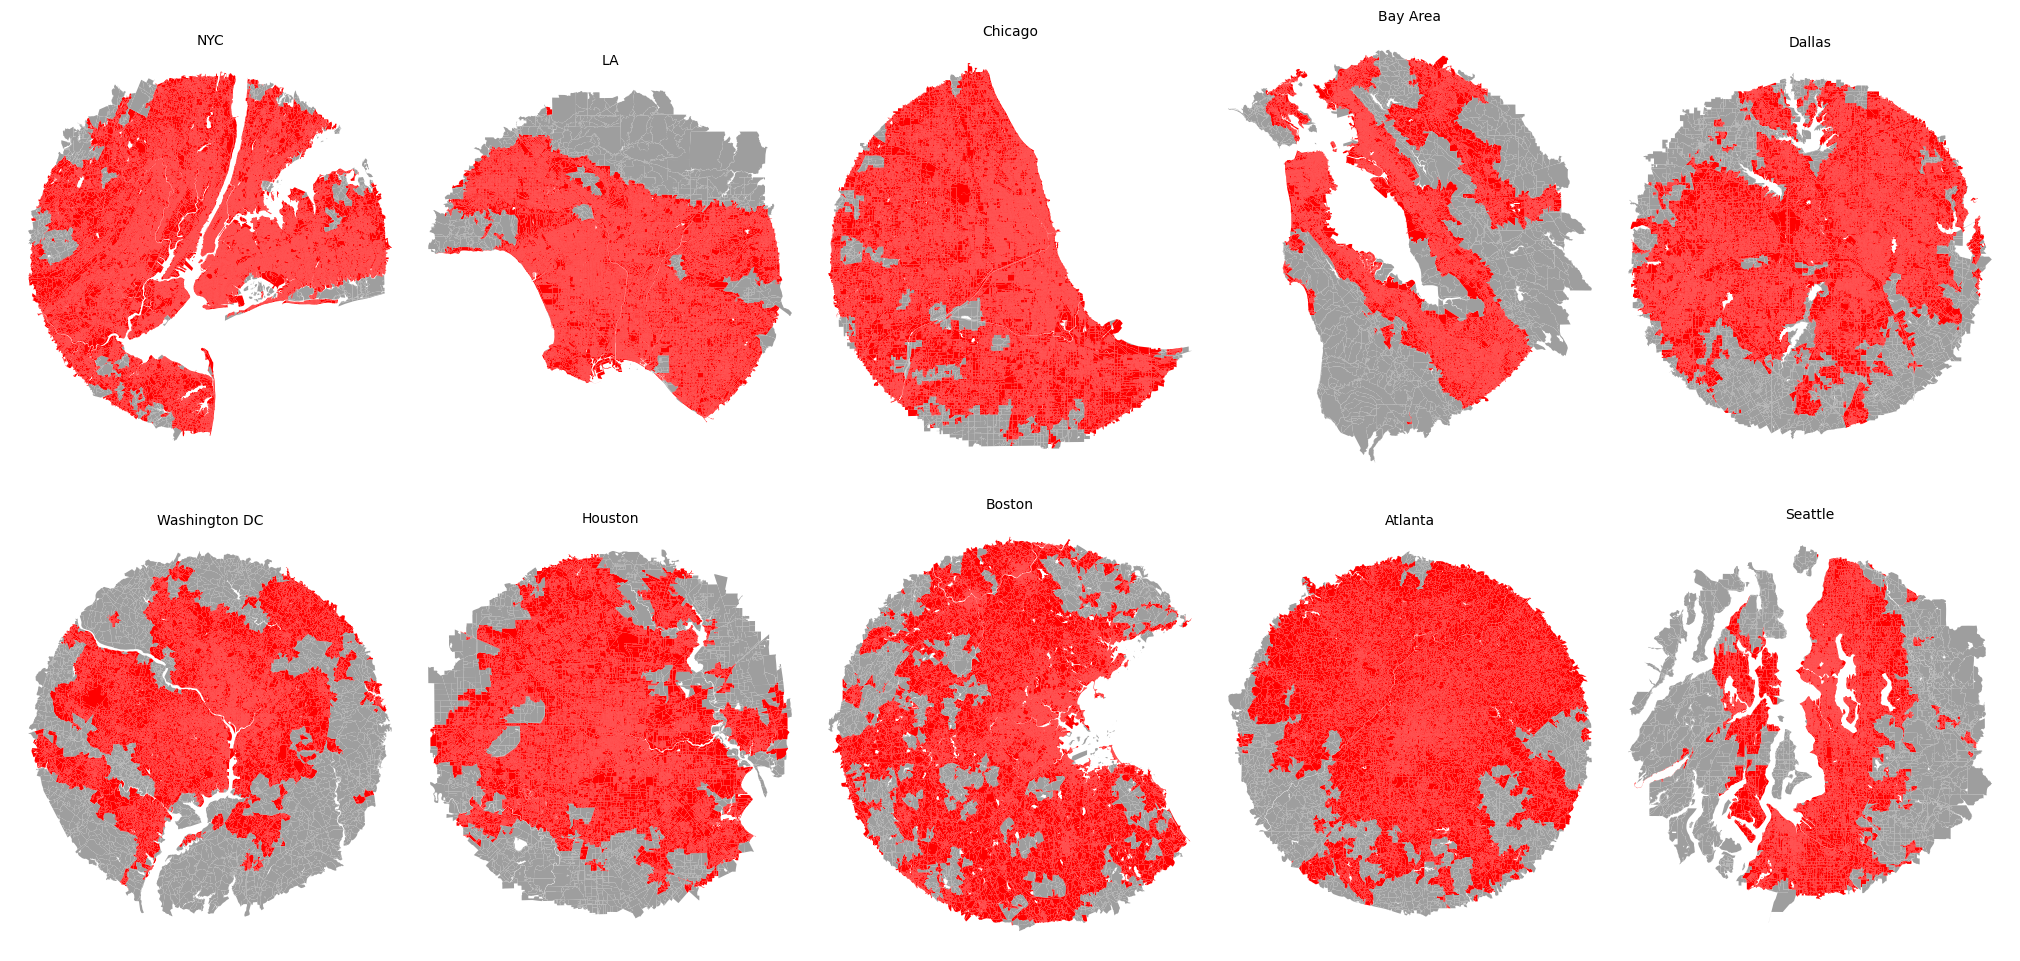

In [33]:
color_urban([nyc, la, chicago, bay, dallas, dc, houston, boston, atlanta, seattle],
            ["NYC","LA","Chicago","Bay Area","Dallas","Washington DC","Houston","Boston","Atlanta","Seattle"])